In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten erzeugen
np.random.seed(0)
n = 100000
age = np.random.normal(30, 10, n)
income = np.random.normal(50000, 15000, n)
education = np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], size=n, p=[0.3, 0.4, 0.2, 0.1])
satisfaction = np.random.normal(5, 2, n)


In [33]:

# In Data Frame schreiben
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Education': education,
    'Satisfaction': satisfaction
})


In [34]:
data

,Age,Income,Education,Satisfaction
0,47.640523,42743.037621,PhD,6.086732
1,34.001572,69320.855970,Bachelors,2.329046
2,39.787380,48051.819324,Bachelors,5.875661
3,52.408932,47028.824185,High School,6.576742
4,48.675580,44982.686125,Bachelors,3.516764
...,...,...,...,...
99995,26.622852,54077.411193,High School,5.778205
99996,9.714516,50757.607277,Masters,3.507351
99997,37.261820,60017.222501,Bachelors,4.344246
99998,18.321695,34682.082220,Bachelors,3.930193


### MAR

In [35]:
def calculate_missing_probability(income):
    return 1 / (1 + np.exp((income - 40000) / 10000))

# Create missingness mask
np.random.seed(1)
missing_mask = (data['Education'] == 'High School') & (np.random.rand(n) < calculate_missing_probability(data['Income']))


In [36]:
mar_data_with_missing = data.copy()
mar_data_with_missing.loc[missing_mask, 'Satisfaction'] = np.nan

In [37]:
mar_data_with_missing

,Age,Income,Education,Satisfaction
0,47.640523,42743.037621,PhD,6.086732
1,34.001572,69320.855970,Bachelors,2.329046
2,39.787380,48051.819324,Bachelors,5.875661
3,52.408932,47028.824185,High School,NaN
4,48.675580,44982.686125,Bachelors,3.516764
...,...,...,...,...
99995,26.622852,54077.411193,High School,5.778205
99996,9.714516,50757.607277,Masters,3.507351
99997,37.261820,60017.222501,Bachelors,4.344246
99998,18.321695,34682.082220,Bachelors,3.930193


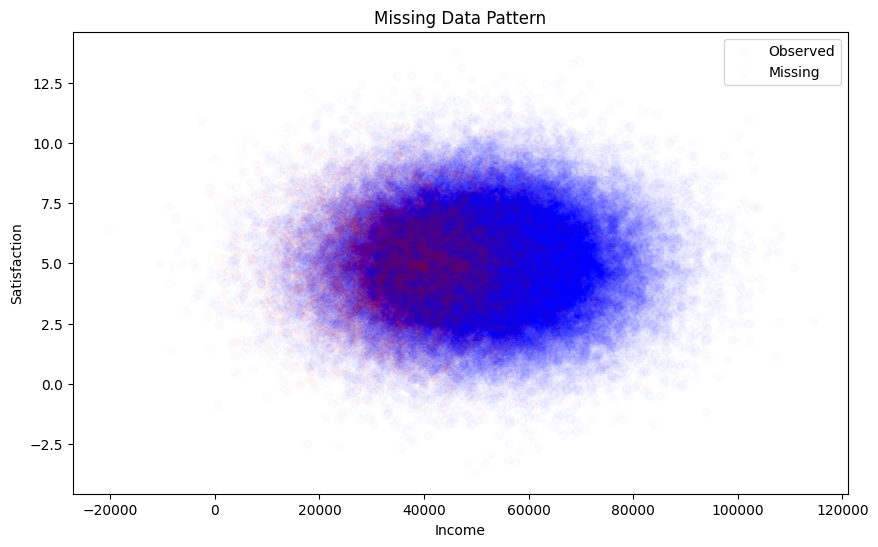

In [39]:
plt.figure(figsize=(10, 6))
plt.title('Missing Data Pattern')
plt.xlabel('Income')
plt.ylabel('Satisfaction')
plt.scatter(
    data['Income'][~missing_mask],
    data['Satisfaction'][~missing_mask],
    alpha=0.01,
    c='b',
    label='Observed'
)
plt.scatter(
    data['Income'][missing_mask],
    data['Satisfaction'][missing_mask],
    alpha=0.01,
    c='r',
    label='Missing'
)
plt.legend()
plt.show()


### MCAR

In [40]:

np.random.seed(1)
missing_mask = np.random.rand(n) < 0.3


In [41]:
mcar_data_with_missing = data.copy()
mcar_data_with_missing.loc[missing_mask, 'Satisfaction'] = np.nan

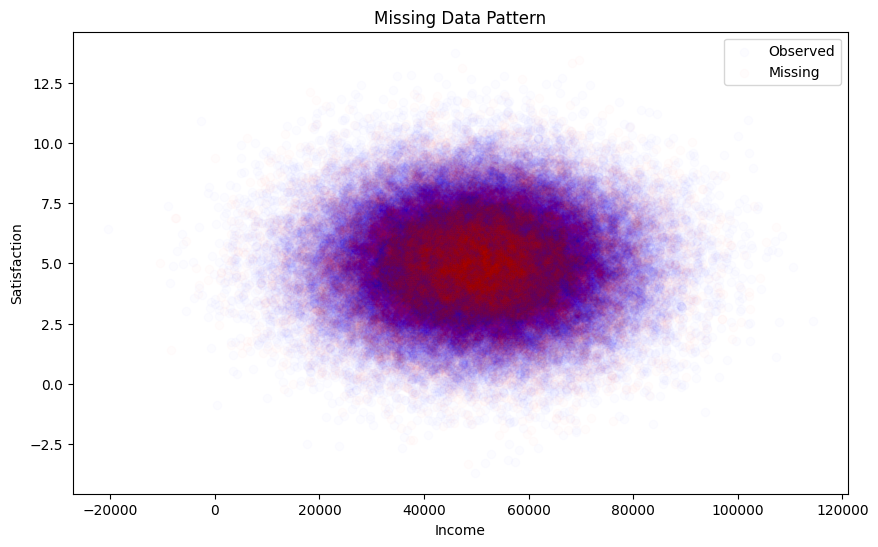

In [43]:
plt.figure(figsize=(10, 6))
plt.title('Missing Data Pattern')
plt.xlabel('Income')
plt.ylabel('Satisfaction')
plt.scatter(
    data['Income'][~missing_mask],
    data['Satisfaction'][~missing_mask],
    alpha=0.01,
    c='b',
    label='Observed'
)
plt.scatter(
    data['Income'][missing_mask],
    data['Satisfaction'][missing_mask],
    alpha=0.01,
    c='r',
    label='Missing'
)
plt.legend()
plt.show()